In [2]:
import os
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#from fancyimpute import KNN

In [3]:
train=pd.read_csv("train_cab.csv")
test=pd.read_csv("test.csv")

In [4]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [6]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
test.tail()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6
9913,2015-01-18 14:06:23 UTC,-73.988022,40.754070,-74.000282,40.759220,6


In [8]:
train.shape

(16067, 7)

In [9]:
test.shape

(9914, 6)

In [10]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [11]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [12]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [13]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


Observations 
1. after exploring data and comparing train and test dataset, i can surely say it contains some outliers . 
2. like, passenger count column has max value as 5345, which is not possible. also, min value is 0 . 
3. pickup_latitude column has max range of 401.08 
4. need to change data types of pickup_datetime column 

## Data cleaning

In [14]:
# Dropping NA values in datetime column
train.dropna(subset= ["pickup_datetime"]) 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [15]:
# changing data type of pickup_datetime variable from object to datetime

train  = pd.read_csv("train_cab.csv",na_values={"pickup_datetime":"43"})
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

In [16]:
train.dtypes

fare_amount                  object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

Observation
1. there was an outlier in column pickup_datetime , when i tried to change its datatype from object to datetime format i came to know about it . 
so again i loaded the dataset file with dropping that outlier and changed its datatype 

In [17]:
# changing data type of pickup_datetime column for test dataset 

test['pickup_datetime']=pd.to_datetime(test['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

In [18]:
#changing data type of fare amount(TARGET VARIABLE) from object to numeric value

train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")

In [19]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

## Univariate analysis

/Users/monikawadhwani/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/monikawadhwani/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/monikawadhwani/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/monikawadhwani/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


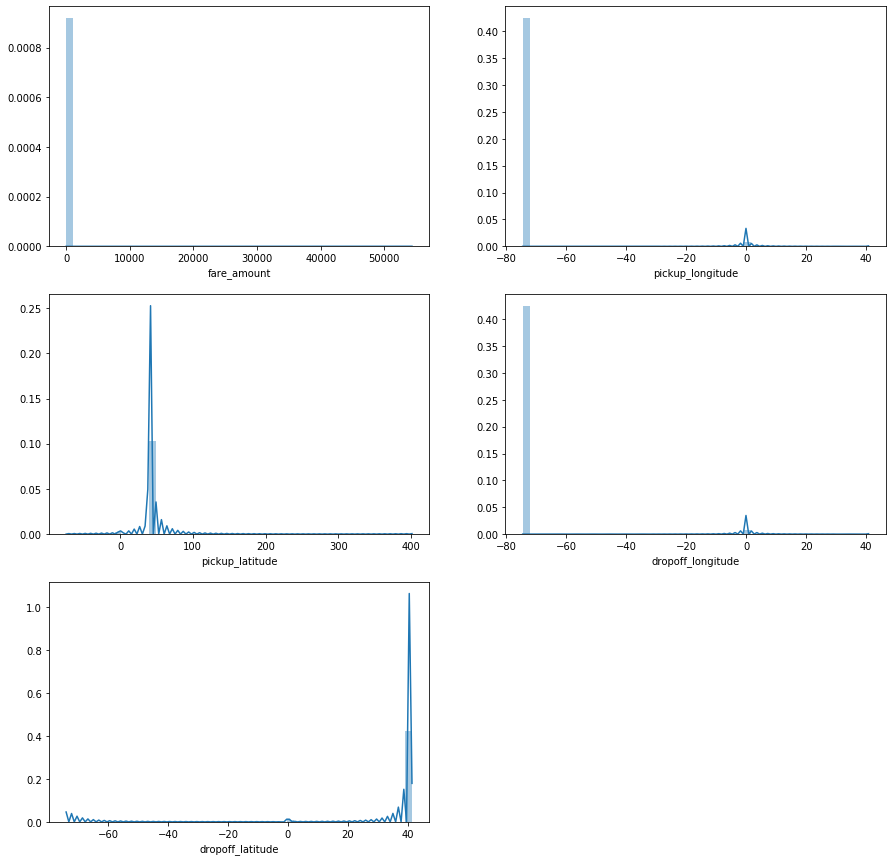

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(321)
_ = sns.distplot(train['fare_amount'],bins=50)
plt.subplot(322)
_ = sns.distplot(train['pickup_longitude'],bins=50)
plt.subplot(323)
_ = sns.distplot(train['pickup_latitude'],bins=50)
plt.subplot(324)
_ = sns.distplot(train['dropoff_longitude'],bins=50)
plt.subplot(325)
_ = sns.distplot(train['dropoff_latitude'],bins=50)
# plt.savefig('hist.png')
plt.show()


In [21]:
# finding skewness 

train.skew(axis=0)

fare_amount          125.404254
pickup_longitude       6.930513
pickup_latitude        2.974901
dropoff_longitude      6.931115
dropoff_latitude      -8.342849
passenger_count       84.622518
dtype: float64

/Users/monikawadhwani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


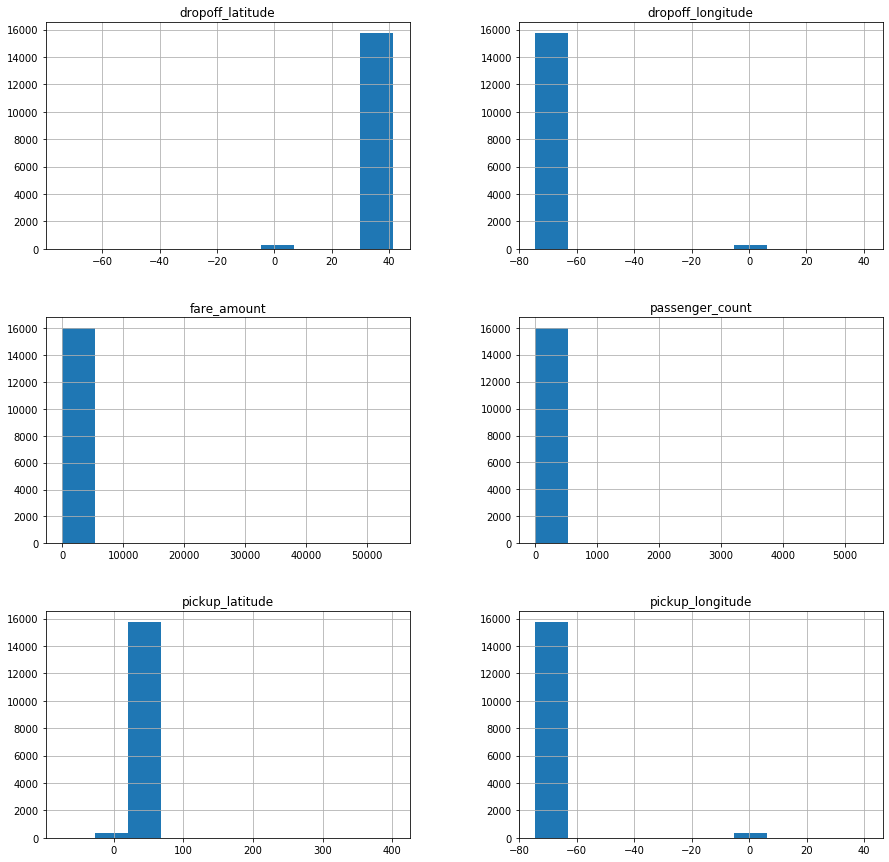

In [22]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
train.hist(ax=ax)
plt.show()

# Multivariate analysis

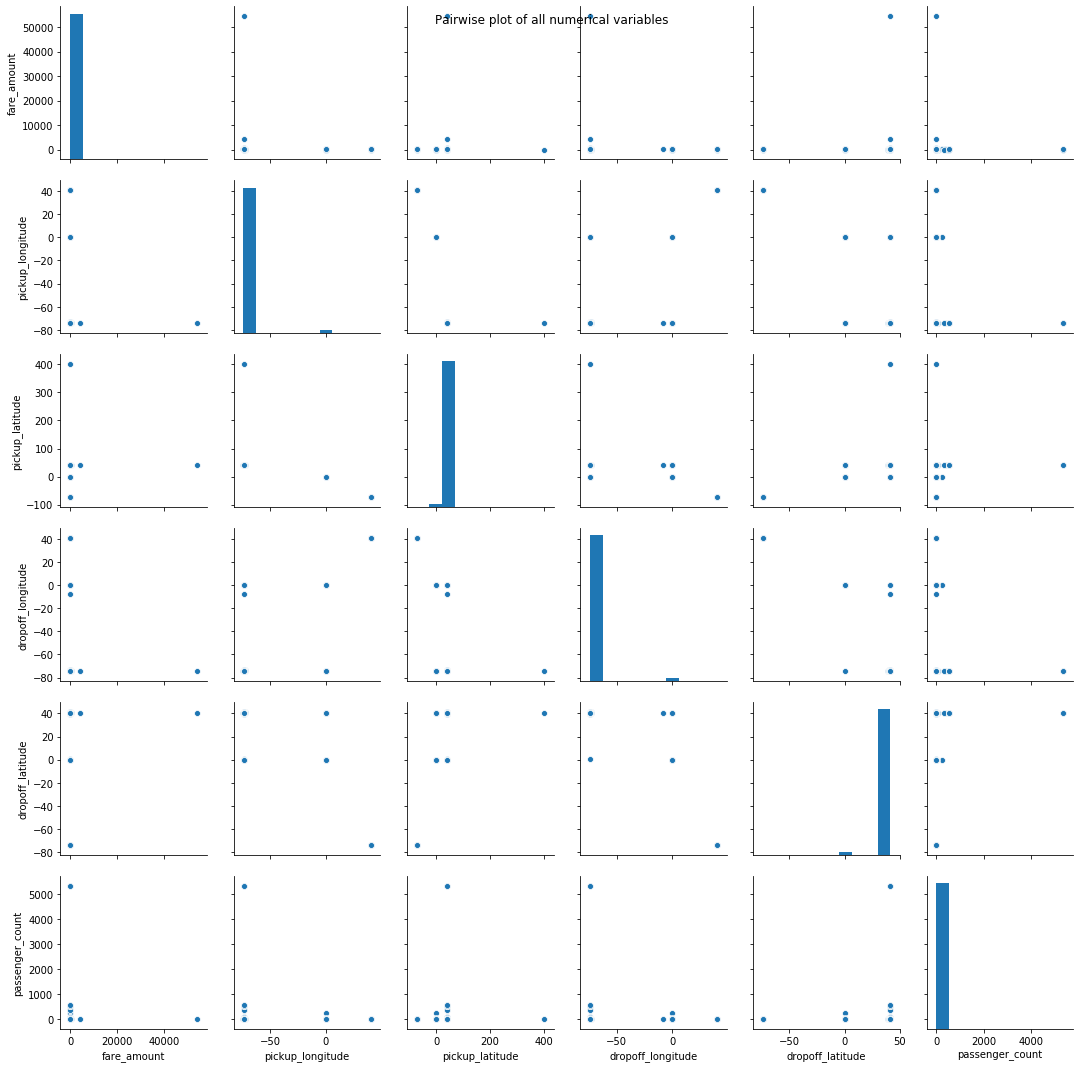

In [24]:
_ =sns.pairplot(data=train,kind='scatter',dropna=True)
_.fig.suptitle('Pairwise plot of all numerical variables')
# plt.savefig('Pairwise.png')
plt.show()

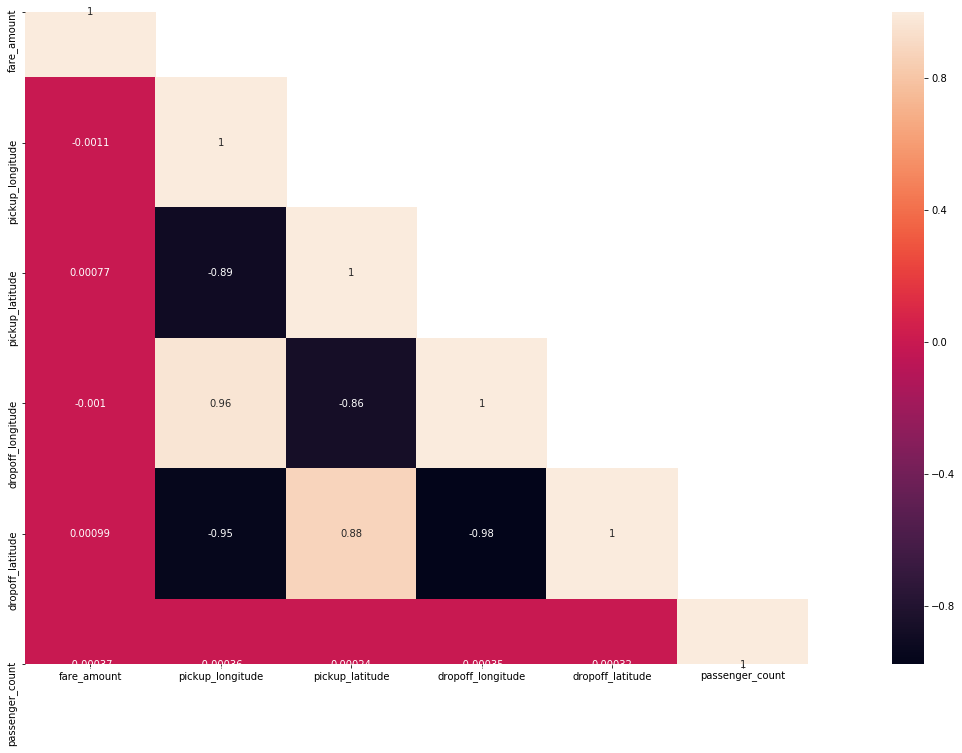

In [25]:
#Check for collinearity using corelation matrix.

cor_mat= train[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

## Outlier analysis

In [26]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


I got this information from Google

1. Latitudes range from -90 to 90.
2. Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them

In [29]:
# checking how many values are out of above given range

train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

# got 1 value which is more than 90

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [30]:
# dropping this value which is greater than 90 in pickup_latitude 

train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [31]:
# checking the number of values which are out of below given range

train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [32]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [33]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [34]:
train.shape

(16066, 7)

checking for passenger count range and removing outliers by setting a range

In [35]:
# checking in test data the max and min value for passenger count
# so that to set a range for train dataset

test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [36]:
for i in range(4,11):
    print('passenger_count above' +str(i)+'={}'.format(sum(train['passenger_count']>i)))

passenger_count above4=1367
passenger_count above5=322
passenger_count above6=20
passenger_count above7=20
passenger_count above8=20
passenger_count above9=20
passenger_count above10=20


In [37]:
# here, max value for passenger count is 5345, which is not possible
# min count is 0 , which is an irrelevent information 

train = train.drop(train[train["passenger_count"] > 6].index, axis=0)

In [38]:
# dropping values which are less than 1

train = train.drop(train[train["passenger_count"] < 1].index, axis=0)

In [39]:
train['passenger_count'].describe()

count    15933.000000
mean         1.649677
std          1.265925
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [40]:
# Removing value 0.12 which is between 0 and 1
train = train.drop(train[train["passenger_count"] == 0.12 ].index, axis=0)
train.shape

(15988, 7)

In [41]:
# to check if any value is between 0 and 1
len(train[train['passenger_count'] < 1])

0

In [42]:
# train['passenger_count'] = train['passenger_count'].astype(int)

In [43]:
train['passenger_count'].describe()

count    15933.000000
mean         1.649677
std          1.265925
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

Checking for fare amount outlier values

In [44]:
# Checking for negative values in fare amount column  

Counter(train["fare_amount"]<0)

Counter({False: 15985, True: 3})

there are 3 negative fare amounts, need to remove this

In [45]:
# Removing negative fare amounts 

train = train.drop(train[train["fare_amount"]<0].index, axis=0)
train.shape

(15985, 7)

In [46]:
##make sure there is no negative values in the fare_amount variable column
train["fare_amount"].min()

0.0

In [47]:
# Removing row where fare amount is 0 , which is also a useless value

train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape

(15983, 7)

## Missing value analysis

In [48]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,fare_amount,24
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [49]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,passenger_count,0.344116
1,fare_amount,0.150160
2,pickup_datetime,0.006257
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [50]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [51]:
#removing datetime variable missing values rows

train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(15982, 7)
0


In [52]:
 
train.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [53]:
# finding descending order of fare amount column to know the highest fare amount

train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15982, dtype: float64

In [54]:
# we can see that the 1, 2 and 3 values in above code statement has very large difference .
# so we are considering them as outliers and removing values which are above 454 

train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0)
train.shape

(15980, 7)

In [55]:
# Dropping NA values

train.dropna(subset= ["fare_amount"]) 
train.dropna(subset= ["passenger_count"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16061,10.9,2009-05-20 18:56:42,-73.994191,40.751138,-73.962769,40.769719,1.0
16062,6.5,2014-12-12 07:41:00,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07,-73.972507,40.753417,-73.979577,40.765495,1.0


In [56]:
train['fare_amount'].isnull().sum()

24

In [57]:
train.std()

fare_amount          10.807517
pickup_longitude     10.544433
pickup_latitude       6.187891
dropoff_longitude    10.572203
dropoff_latitude      6.187519
passenger_count       1.266033
dtype: float64

In [58]:
train.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [59]:
# removing passenger_count and fare_amount missing values rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
train = train.drop(train[train['fare_amount'].isnull()].index, axis = 0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15901, 7)
0


In [60]:
#train.isnull().sum()

In [61]:
train.shape

(15901, 7)

In [62]:
# checkin for any missing value
train.isnull().any()

fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
dtype: bool

### Splitting the pickup_datetime column 

Splitting pickup_datetime column in 'year' , 'month' , 'day' , 'day of week' , 'hour' , 'minute'

In [66]:
train['year'] = train['pickup_datetime'].dt.year
train['month'] = train['pickup_datetime'].dt.month
train['date'] = train['pickup_datetime'].dt.day
train['day'] = train['pickup_datetime'].dt.dayofweek
train['hour'] = train['pickup_datetime'].dt.hour
train['minute'] = train['pickup_datetime'].dt.minute

In [67]:
# checking data types after splitting pickup_datetime column into new columns

train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
month                         int64
date                          int64
day                           int64
hour                          int64
minute                        int64
dtype: object

In [68]:
# splitting pickup_datetime column into 'year' , 'month' , 'day' , 'day of week' , 'hour' , 'minute'

test['year'] = test['pickup_datetime'].dt.year
test['month'] = test['pickup_datetime'].dt.month
test['date'] = test['pickup_datetime'].dt.day
test['day'] = test['pickup_datetime'].dt.dayofweek
test['hour'] = test['pickup_datetime'].dt.hour
test['minute'] = test['pickup_datetime'].dt.minute

In [69]:
# checking data types after splitting pickup_datetime column into new columns

test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
month                         int64
date                          int64
day                           int64
hour                          int64
minute                        int64
dtype: object

In [70]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
minute               0
dtype: int64

In [71]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
minute               0
dtype: int64

We have cleared our both the datasets and ready to proceed for futher operations

## Calculating distance between given coordinates

In [72]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [73]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [74]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [75]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [76]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


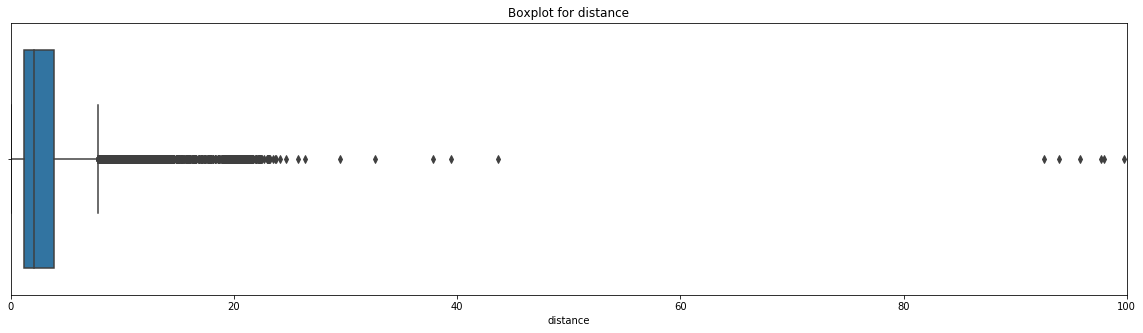

In [77]:
# boxplot for distance column to check outliers

plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train['distance'],data=train,orient='h')
plt.title('Boxplot for distance')

plt.show()

above plot shows that there are so many outliers in distance column

In [78]:
train['distance'].head()

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: distance, dtype: float64

In [79]:
train['distance'].tail()

16061    3.357490
16062    0.850044
16063    7.867638
16064    1.469105
16065    2.590036
Name: distance, dtype: float64

In [80]:
# finding decending order of fare to get to know whether the outliers are presented or not

train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
13050       0.000000
11593       0.000000
2346        0.000000
8331        0.000000
1637        0.000000
Name: distance, Length: 15901, dtype: float64

In [81]:
# Checking for values which are 0 in distance column in train data

Counter(train['distance'] == 0)

Counter({False: 15447, True: 454})

In [82]:
# Checking for values which are 0 in distance column in test data

Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [83]:
# removing distance column values which are 0 in train data

train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15447, 14)

In [84]:
# removing distance column values which are 0 in test data

test = test.drop(test[test['distance']== 0].index, axis=0)
test.shape

(9829, 13)

In [85]:
# removing rows whose distance values is very high which is more than 129kms

train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15424, 14)

In [86]:
# dropping some columns from train data

train_drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'minute']
train = train.drop(train_drop, axis = 1)

In [87]:
train.head()

,fare_amount,passenger_count,year,month,date,day,hour,distance
0,4.5,1.0,2009,6,15,0,17,1.030764
1,16.9,1.0,2010,1,5,1,16,8.450134
2,5.7,2.0,2011,8,18,3,0,1.389525
3,7.7,1.0,2012,4,21,5,4,2.799270
4,5.3,1.0,2010,3,9,1,7,1.999157


In [88]:
train.shape

(15424, 8)

In [89]:
train.dtypes

fare_amount        float64
passenger_count    float64
year                 int64
month                int64
date                 int64
day                  int64
hour                 int64
distance           float64
dtype: object

In [90]:
# dropping some columns from test data

test_drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'minute']
test = test.drop(test_drop, axis = 1)

In [91]:
test.head()

,passenger_count,year,month,date,day,hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [92]:
test.shape

(9829, 7)

In [93]:
test.dtypes

passenger_count      int64
year                 int64
month                int64
date                 int64
day                  int64
hour                 int64
distance           float64
dtype: object

# Data visualisation

In [94]:
train["passenger_count"].unique()

array([1. , 2. , 3. , 6. , 5. , 4. , 1.3])

In [95]:
train = train.drop(train[train["passenger_count"] == 1.3 ].index, axis=0)
train.shape

(15423, 8)

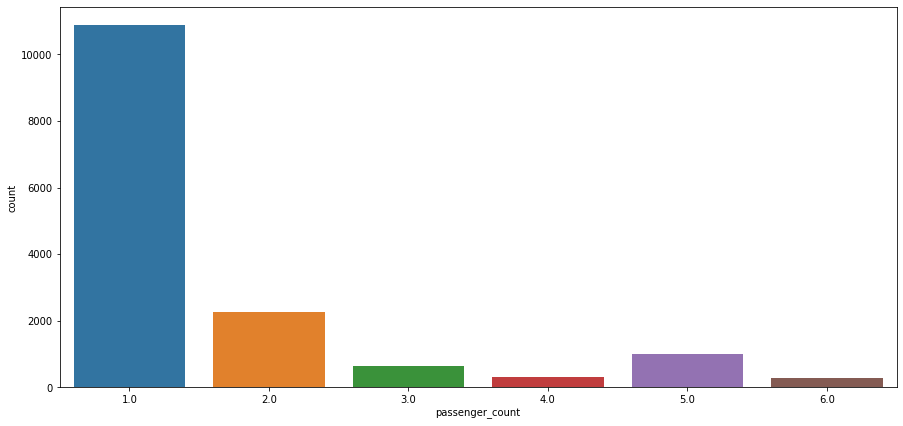

In [96]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

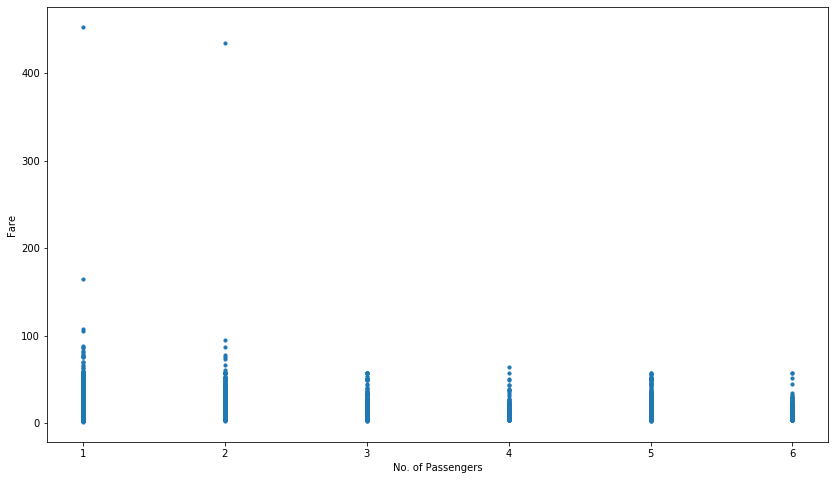

In [97]:
# relationship between fare and passenger count

plt.figure(figsize=(14,8))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

OBSERVATION : 
1. there are more number of single and double passengers.
2. single and double passengers are contibuting more to fare amount. 

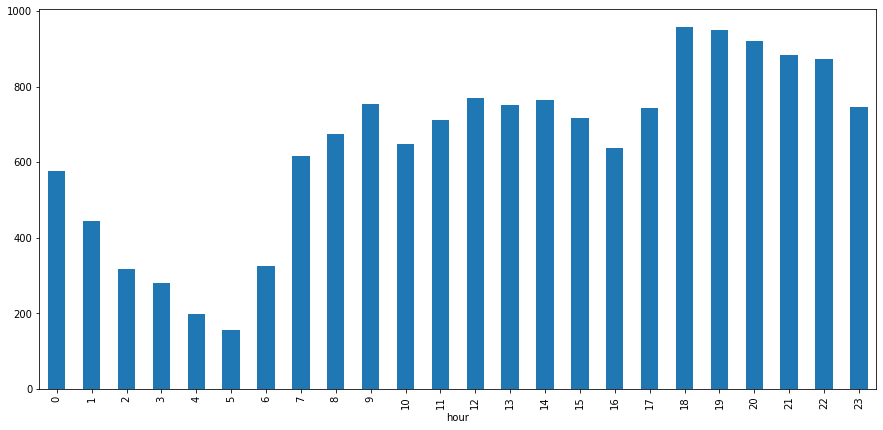

In [98]:

plt.figure(figsize=(15,7))
train.groupby(train["hour"])['hour'].count().plot(kind="bar")
plt.show()

OBSERVATIONS : Least cabs taken at 5 am and highest no of cabs taken are at 6 pm and after that . In office rush hours

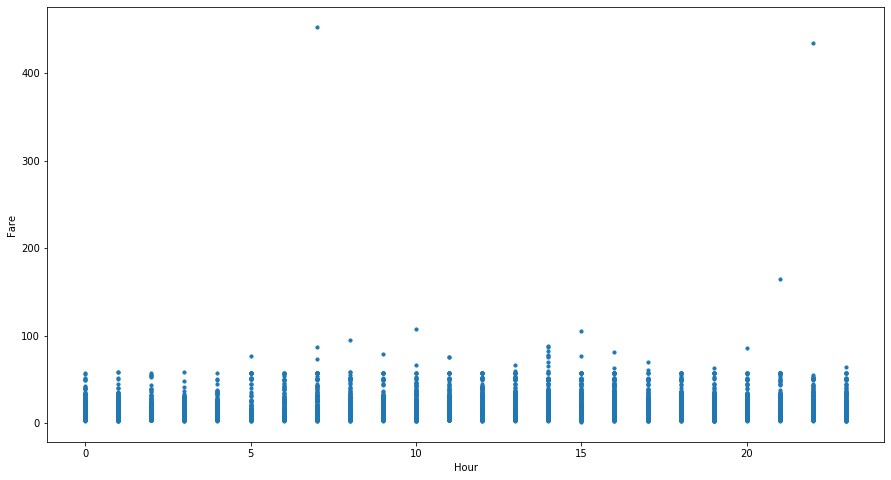

In [99]:
#Relationship between Time and Fare
plt.figure(figsize=(15,8))
plt.scatter(x=train['hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

OBSERVATION : cabs taken early in morning and after 7pm (including late nights) are costliest.

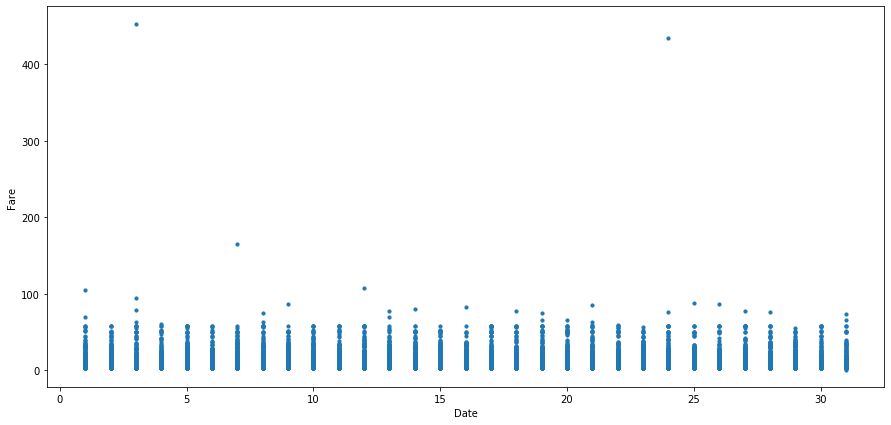

In [100]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

OBSERVATION : Fares seems to be highest on 3rd and 24th of the month .

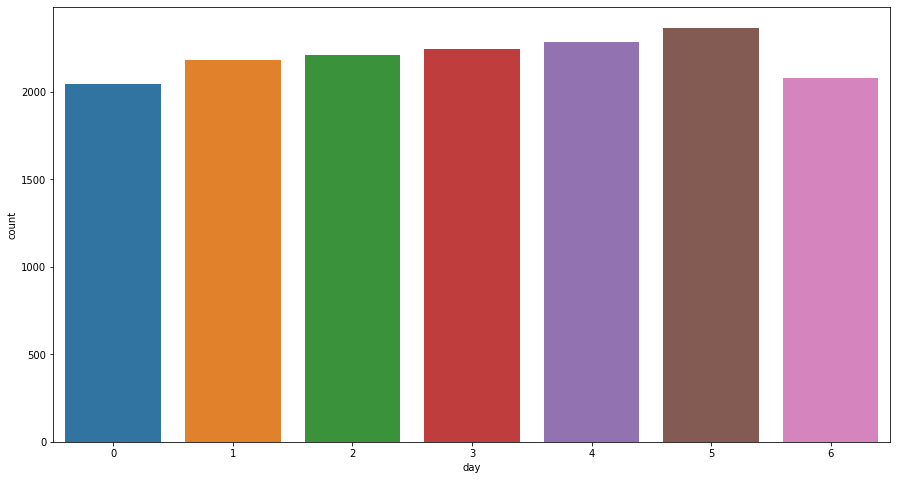

In [101]:
# Relationship between Day and number of cab rides

plt.figure(figsize=(15,8))
sns.countplot(x="day", data=train)

OBSERVATION : it seems no impact of day of week on number of cab ride

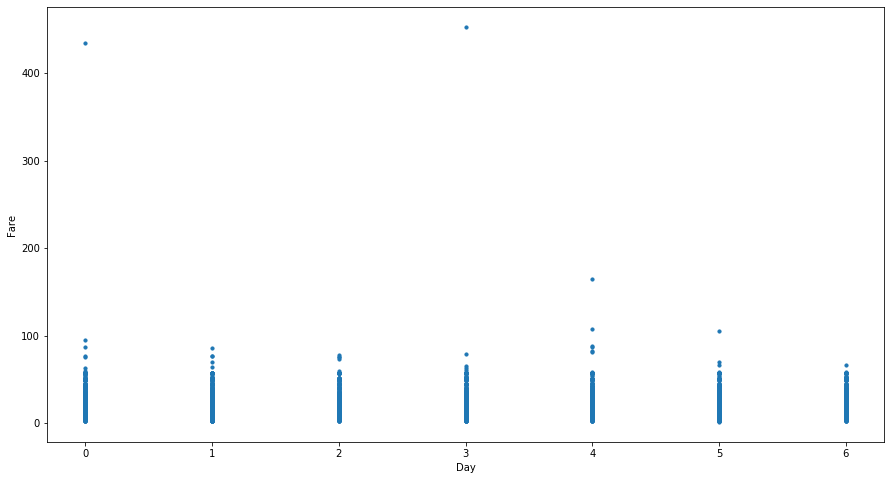

In [102]:
# Relationship between day and Fare
plt.figure(figsize=(15,8))
plt.scatter(x=train['day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()


OBSERVATION :
1. On sunday , wednesday and thursday fares are more compare to other days of week.
2. On saturday, fares seems to be lower compared to other days
3. cabs requirement may be more on sundays and thurdays . sundays are holidays and usually everyone goes out to spend there weekend .

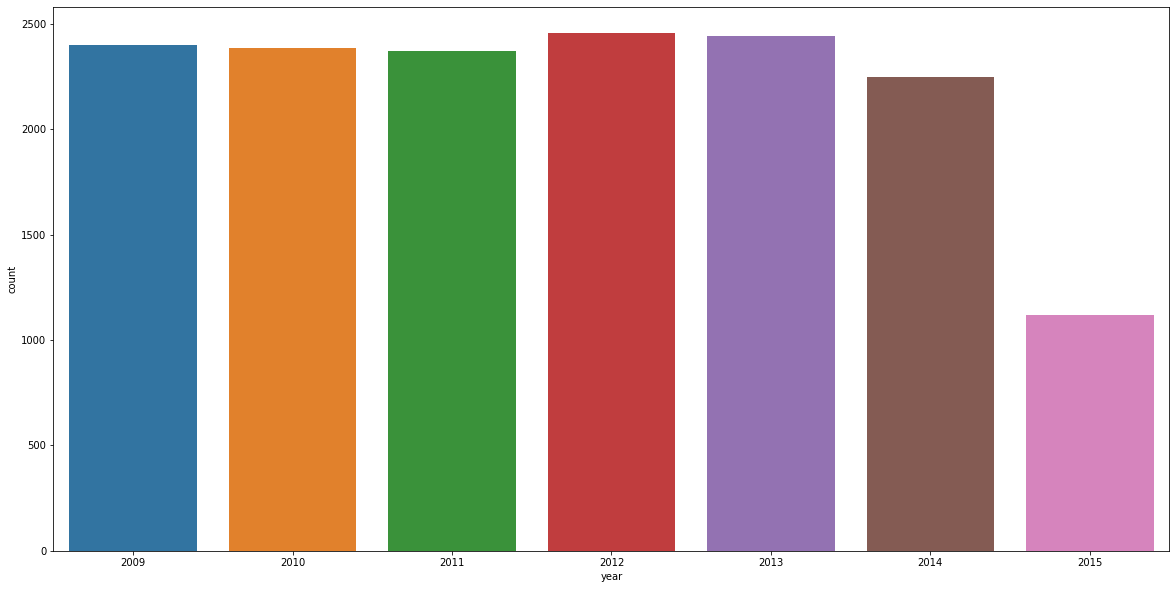

In [190]:
# Relationship between year and fare
plt.figure(figsize=(20,10))
sns.countplot(train['year'])

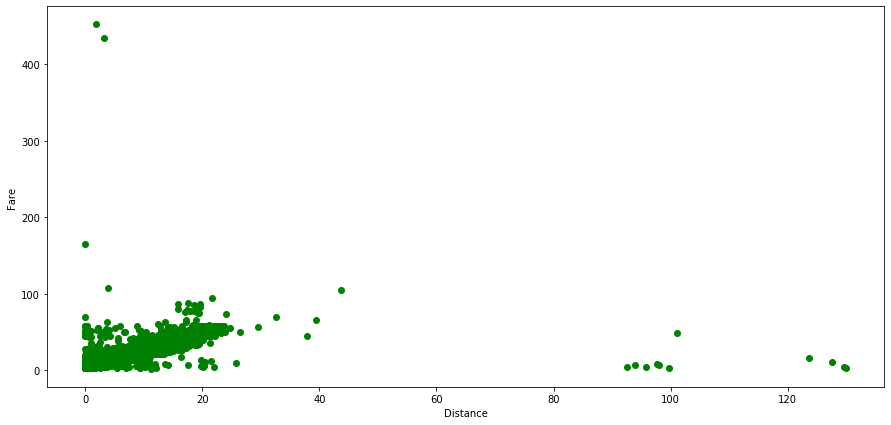

In [103]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

fare_amount


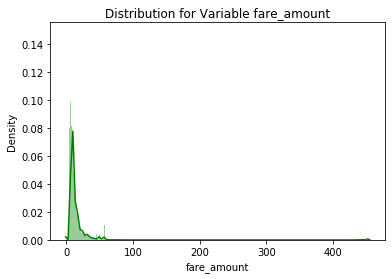

distance


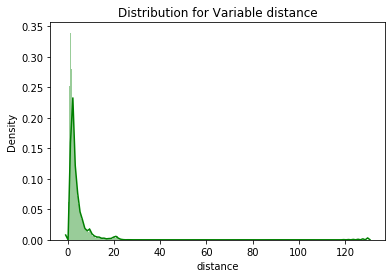

In [104]:
#Normality check of training data is uniformly distributed or not

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [105]:
# skewness of target variable is high, apply log transform to reduce the skewness
train['fare_amount'] = np.log1p(train['fare_amount'])

# skewness of distance variable is high, apply log transform to reduce the skewness
train['distance'] = np.log1p(train['distance'])

fare_amount


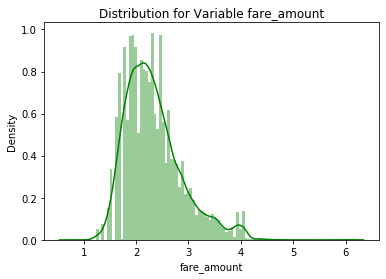

distance


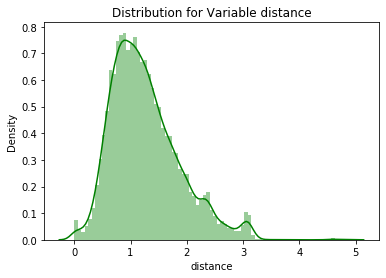

In [106]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

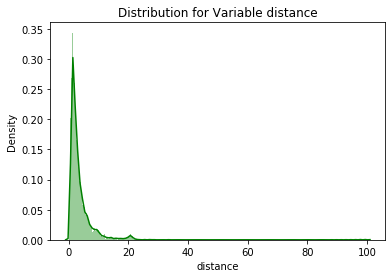

In [107]:
#Normality check for test data is uniformly distributed or not

sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [108]:
# since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

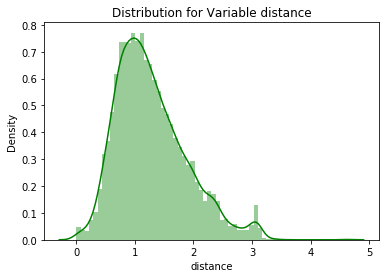

In [109]:
# rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# Applying ML Algorithms

## Linear Regression 

In [128]:
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [129]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [130]:
print(X_train.shape)
print(X_test.shape)

(12338, 7)
(3085, 7)


In [131]:
# Building model on top of training dataset

model_LR = LinearRegression().fit(X_train , y_train)

In [132]:
#prediction on train data
pred_train_LR = model_LR.predict(X_train)

In [133]:
#prediction on test data
pred_test_LR = model_LR.predict(X_test)

In [134]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [135]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.273468175356483
Root Mean Squared Error For Test data = 0.25353325112539815


In [136]:
#calculate R^2 for train data

r2_score(y_train, pred_train_LR)

0.7520104955245438

In [137]:
r2_score(y_test, pred_test_LR)

0.7717663125348941

## Decision Tree

In [138]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
model_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [146]:
#prediction on train data
pred_train_DT = model_DT.predict(X_train)

#prediction on test data
pred_test_DT = model_DT.predict(X_test)

In [147]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))


In [148]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.2987622841913647
Root Mean Squared Error For Test data = 0.29033494966666307


In [149]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.7040139402340186

In [150]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7006987490033475

## Random Forest

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
model_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [154]:
#prediction on train data
pred_train_RF = model_RF.predict(X_train)
#prediction on test data
pred_test_RF = model_RF.predict(X_test)


In [155]:
# calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
# calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [156]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.09511897194723994
Root Mean Squared Error For Test data = 0.23588655844563153


In [157]:
# calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.9699977372294951

In [158]:
# calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.8024321452400145

# Gradient Boosting

In [161]:
from sklearn.ensemble import GradientBoostingRegressor

In [162]:
model_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [163]:
#prediction on train data
pred_train_GB = model_GB.predict(X_train)

#prediction on test data
pred_test_GB = model_GB.predict(X_test)

In [164]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [165]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.22696660127989676
Root Mean Squared Error For Test data = 0.2268880096081583


In [166]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.8291780702853083

In [167]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.8172181846049508

## Optimising the results with parameter tuning

In [168]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [169]:
# Random hyperparameter grid

from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [170]:
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)


Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.81.
RMSE =  0.23350274924459768


In [171]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [174]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  0.25373422396796785


In [175]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 17}
R-squared = 0.8.
RMSE =  0.23449335563155435


In [176]:
## Grid Search CV for gradient boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.79.
RMSE =  0.24181328032814908


## Prediction on test data

In [177]:
# Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [178]:
predictions_GRF_test_Df

array([2.38286091, 2.39076677, 1.68424882, ..., 4.01055833, 3.30239266,
       2.0302154 ])

In [179]:
test['Predicted_fare'] = predictions_GRF_test_Df

In [180]:
test.head()

,passenger_count,year,month,date,day,hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.200946,2.382861
1,1,2015,1,27,1,13,1.231205,2.390767
2,1,2011,10,8,5,11,0.481579,1.684249
3,1,2012,12,1,5,21,1.085538,2.201687
4,1,2012,12,1,5,21,1.854312,2.806115


In [181]:
test.to_csv('test.csv')